# Задача о распаде разрыва для системы уравнений акустики

In [1]:
import numpy as np
import matplotlib.pyplot as plt

c0 = 2.
ro0 = 0.25
L = 4.
T = 1.
gridWidth = 200
gridHeight = 200
xStep = L/gridWidth
tau = T/gridHeight
Q = c0*tau/xStep

if (Q < 1):
    print("ЕСТЬ СХОДИМОСТЬ")
else:
    print("НЕТ СХОДИМОСТИ")

def Y0(x):
    if (x < 0):
        return 1. + 5./(c0*ro0)
    elif (x > 0):
        return 2./(c0*ro0)

def Z0(x):
    if (x < 0):
        return 1. - 5./(c0*ro0)
    elif (x > 0):
        return -2./(c0*ro0)   
    
def Triple_Hybrid(U_1,U_2,U_3,U_4,U_5):
    if (U_1 - U_3 < 0) and (U_2 > U_1) and (U_2 < U_3):
        return U_2
    elif (U_1 - U_3 > 0) and (U_2 < U_1) and (U_2 > U_3):
        return U_2
    elif (U_1 - U_3 < 0) and (U_5 > U_1) and (U_5 < U_3):
          return U_5
    elif (U_1 - U_3 > 0) and (U_5 < U_1) and (U_5 > U_3):
        return U_5
    else:
        return U_4

x =[]
t = []

x.append(-2)
for i in range(gridWidth - 1):
    x.append(x[i] + xStep)

t.append(0)
for i in range(gridHeight - 1):
        t.append(t[i] + tau)

U_real = []
P_real = []

for i in range(gridWidth):
    U_real.append(0.5*(Y0(x[i] - c0*t[50]) + Z0(x[i] + c0*t[50])))
    P_real.append(0.5*c0*ro0*(Y0(x[i] - c0*t[50]) - Z0(x[i] + c0*t[50])))

ЕСТЬ СХОДИМОСТЬ


## Минимальная апроксимационная вязкость

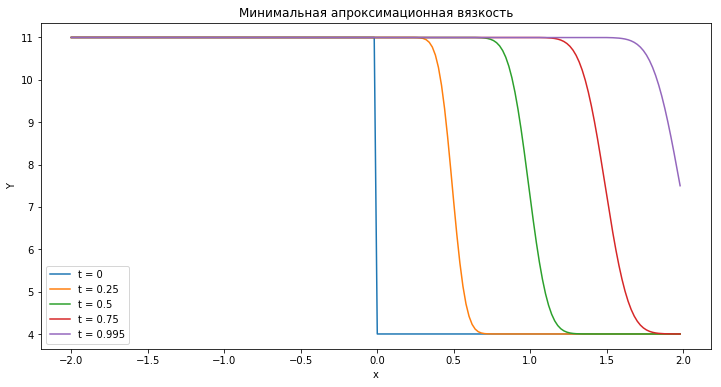

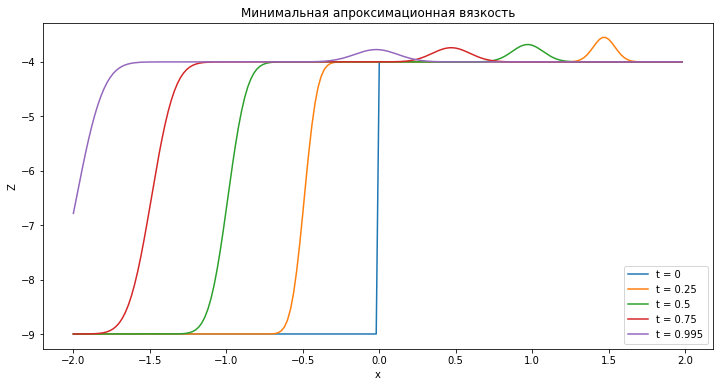

In [2]:
Y = np.zeros((gridWidth,gridHeight))
Z = np.zeros((gridWidth,gridHeight))

for i in range(gridWidth):
    Y[i,0] = Y0(x[i])
    Z[i,0] = Z0(x[i])

for j in range(gridHeight):
    Y[0,j] = 1. + 5./(c0*ro0)
    Z[0,j] = 1. - 5./(c0*ro0)
    Z[gridWidth-1,j] = -2./(c0*ro0)
    
for i in range(1, gridHeight - 1):
    Y[i,1] = (1 - Q)*Y[i,0] + Q*Y[i-1,0]
for i in range(1, gridHeight - 2):
    Z[i,1] = (1 + Q)*Z[i,0] - Q*Z[i+1,0]
    
for j in range(1, gridHeight - 1):
    for i in range(1, gridWidth):
        Y[i,j+1] = 1./2 *Y[i,j] + 1./2 *Y[i-1,j]
        
for j in range(1, gridHeight - 1):
    for i in range(gridWidth-1):
        Z[i,j+1] = 1./2 *Z[i,j] + 1./2 *Z[i+1,j]

#for j in range(1, gridHeight - 1):
#    for i in range(gridWidth-2, -1, -1):
#        Z[i,j+1] = 2./3 *Z[i,j] + 1./3 *Z[i+1,j+1]

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, Y[:,i], label='t = %s'%t[i])
    plt.legend(loc = 'best')
    plt.title(u'Минимальная апроксимационная вязкость')
    plt.xlabel('x')
    plt.ylabel('Y')
plt.show()

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, Z[:,i], label='t = %s'%t[i])
    plt.legend(loc = 'best')
    plt.title(u'Минимальная апроксимационная вязкость')
    plt.xlabel('x')
    plt.ylabel('Z')
plt.show()

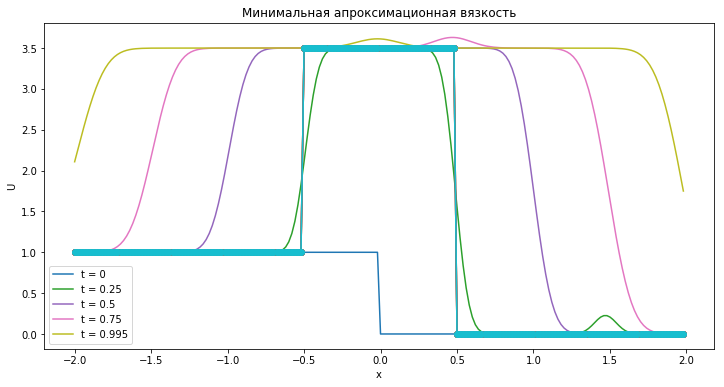

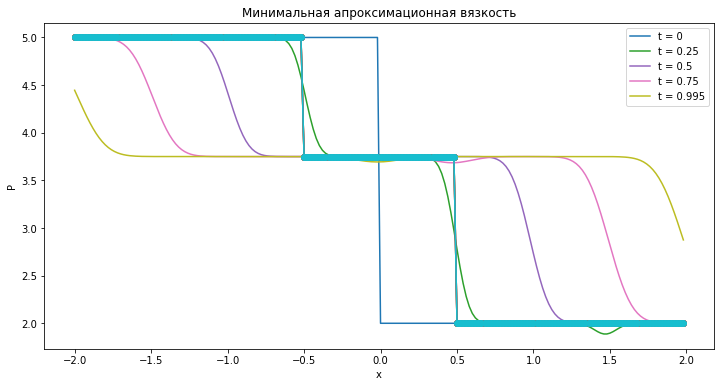

In [3]:
U = np.zeros((gridWidth,gridHeight))
P  = np.zeros((gridWidth,gridHeight))

for j in range(gridHeight):
    for i in range(gridWidth):
        U[i,j] = 0.5*(Y[i,j] + Z[i,j])
        P[i,j] = 0.5*c0*ro0*(Y[i,j] - Z[i,j])

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.plot(x, U_real, marker = "o")
    plt.legend(loc = 'best')
    plt.title(u'Минимальная апроксимационная вязкость')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, P[:,i], label='t = %s'%t[i])
    plt.plot(x, P_real, marker = "o")
    plt.legend(loc = 'best')
    plt.title(u'Минимальная апроксимационная вязкость')
    plt.xlabel('x')
    plt.ylabel('P')
plt.show()

## Наименее осциллирующая на разрывных решениях схема второго порядка аппроксимации

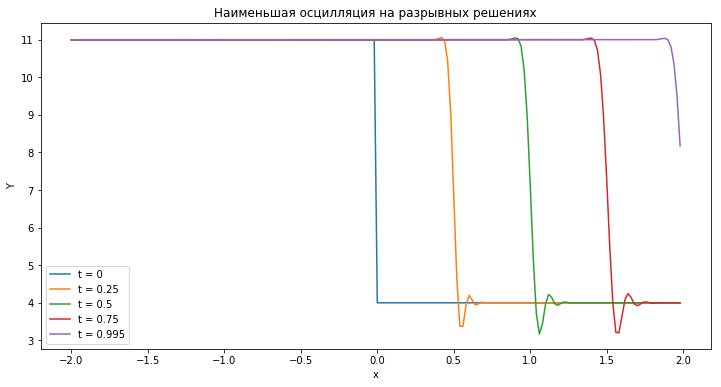

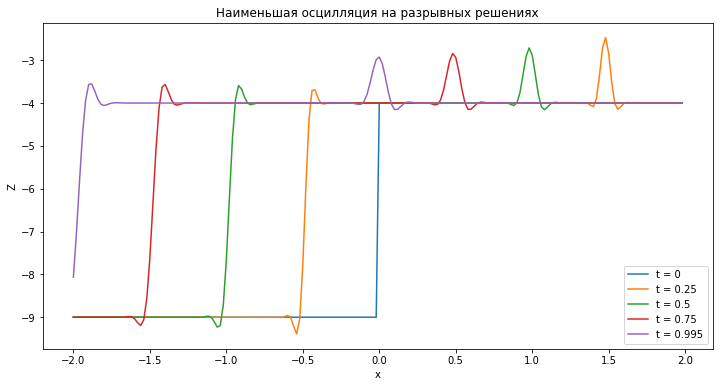

In [4]:
Y = np.zeros((gridWidth,gridHeight))
Z  = np.zeros((gridWidth,gridHeight))

for i in range(gridWidth):
    Y[i,0] = Y0(x[i])
    Z[i,0] = Z0(x[i])

for j in range(gridHeight):
    Y[0,j] = 1. + 5./(c0*ro0)
    Z[0,j] = 1. - 5./(c0*ro0)
    Z[gridWidth-1,j] = -2./(c0*ro0)
    
for i in range(1, gridHeight - 1):
    Y[i,1] = (1 - Q)*Y[i,0] + Q*Y[i-1,0]
for i in range(1, gridHeight - 2):
    Z[i,1] = (1 + Q)*Z[i,0] - Q*Z[i+1,0]
    
for j in range(1, gridHeight - 1):
    for i in range(1, gridWidth):
        Y[i,j+1] = 3./5 *Y[i,j] + 11./15 *Y[i-1,j] - 2./15 *Y[i,j-1] - 1./5 *Y[i-1,j+1]
        
for j in range(1, gridHeight - 1):
    for i in range(gridWidth-2,-1,-1):
        Z[i,j+1] = 11./15 *Z[i,j] - 1./5 *Z[i,j-1] - 2./15 *Z[i+1,j+1] + 3./5 *Z[i+1,j]

#for j in range(1, gridHeight - 1):
#    for i in range(gridWidth-2,-1,-1):
#        Z[i,j+1] = 4./3 *Z[i,j] - 1./2 *Z[i,j-1] + 1./6 *Z[i+1,j+1] + 0 *Z[i+1,j]

#for j in range(1, gridHeight - 1):
#    for i in range(gridWidth-2,-1,-1):
#        Z[i,j+1] = 2./3 *Z[i,j] - 1./6 *Z[i,j-1] - 1./6 *Z[i+1,j+1] + 2./3 *Z[i+1,j]
        
plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, Y[:,i], label='t = %s'%t[i])
    plt.legend(loc = 'best')
    plt.title(u'Наименьшая осцилляция на разрывных решениях')
    plt.xlabel('x')
    plt.ylabel('Y')
plt.show()

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, Z[:,i], label='t = %s'%t[i])
    plt.legend(loc = 'best')
    plt.title(u'Наименьшая осцилляция на разрывных решениях')
    plt.xlabel('x')
    plt.ylabel('Z')
plt.show()

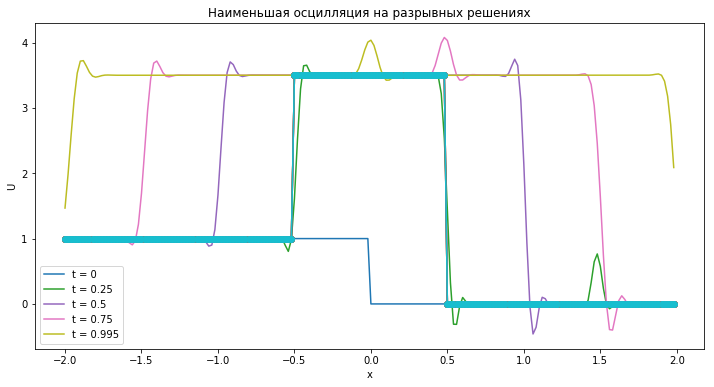

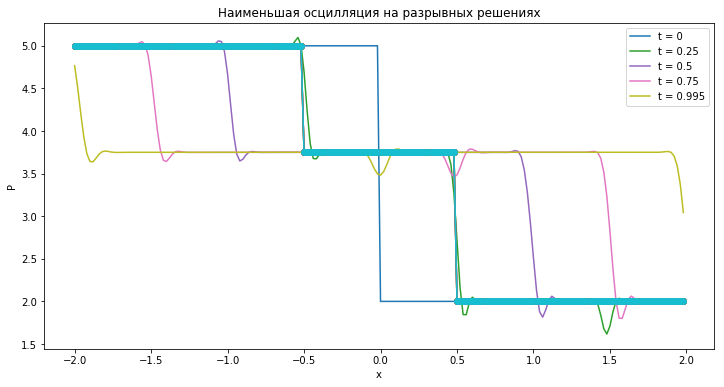

In [5]:
U = np.zeros((gridWidth,gridHeight))
P  = np.zeros((gridWidth,gridHeight))

for j in range(gridHeight):
    for i in range(gridWidth):
        U[i,j] = 0.5*(Y[i,j] + Z[i,j])
        P[i,j] = 0.5*c0*ro0*(Y[i,j] - Z[i,j])

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.plot(x, U_real, marker = "o")
    plt.legend(loc = 'best')
    plt.title(u'Наименьшая осцилляция на разрывных решениях')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, P[:,i], label='t = %s'%t[i])
    plt.plot(x, P_real, marker = "o")
    plt.legend(loc = 'best')
    plt.title(u'Наименьшая осцилляция на разрывных решениях')
    plt.xlabel('x')
    plt.ylabel('P')
plt.show()

## Гибридная схема

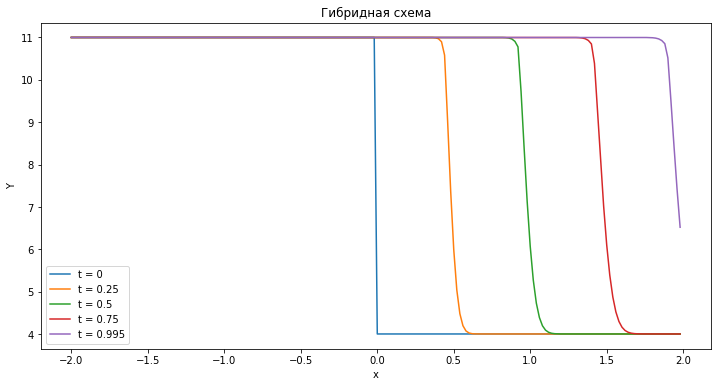

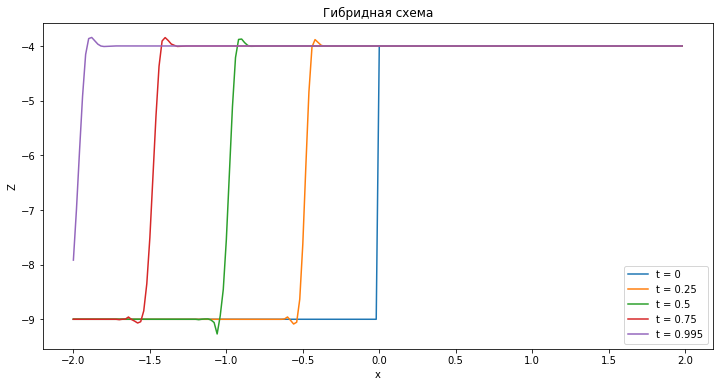

In [6]:
Y = np.zeros((gridWidth,gridHeight))
Y_1 = np.zeros((gridWidth,gridHeight))
Y_2 = np.zeros((gridWidth,gridHeight))
Y_3 = np.zeros((gridWidth,gridHeight))
Z = np.zeros((gridWidth,gridHeight))
Z_1 = np.zeros((gridWidth,gridHeight))
Z_2 = np.zeros((gridWidth,gridHeight))
Z_3 = np.zeros((gridWidth,gridHeight))

for i in range(gridWidth):
    Y[i,0] = Y0(x[i])
    Y_1[i,0] = Y0(x[i])
    Y_2[i,0] = Y0(x[i])
    Y_3[i,0] = Y0(x[i])
    Z[i,0] = Z0(x[i])
    Z_1[i,0] = Z0(x[i])
    Z_2[i,0] = Z0(x[i])
    Z_3[i,0] = Z0(x[i])
    
for j in range(gridHeight):
    Y[0,j] = 1. + 5./(c0*ro0)
    Y_1[0,j] = 1. + 5./(c0*ro0)
    Y_2[0,j] = 1. + 5./(c0*ro0)
    Y_3[0,j] = 1. + 5./(c0*ro0)
    Z[0,j] = 1. - 5./(c0*ro0)
    Z[gridWidth-1,j] = -2./(c0*ro0)
    Z_1[0,j] = 1. - 5./(c0*ro0)
    Z_1[gridWidth-1,j] = -2./(c0*ro0)
    Z_2[0,j] = 1. - 5./(c0*ro0)
    Z_2[gridWidth-1,j] = -2./(c0*ro0)
    Z_3[0,j] = 1. - 5./(c0*ro0)
    Z_3[gridWidth-1,j] = -2./(c0*ro0)

# Схема1
for i in range(1, gridHeight - 1):
    Y[i,1] = (1 - Q)*Y[i,0] + Q*Y[i-1,0]
    Y_1[i,1] = (1 - Q)*Y_1[i,0] + Q*Y_1[i-1,0]
    Y_2[i,1] = (1 - Q)*Y_2[i,0] + Q*Y_2[i-1,0]
    Y_3[i,1] = (1 - Q)*Y_3[i,0] + Q*Y_3[i-1,0]
    Z[i,1] = (1 - Q)*Z[i,0] + Q*Z[i-1,0]
    Z_1[i,1] = (1 - Q)*Z_1[i,0] + Q*Z_1[i-1,0]
    Z_2[i,1] = (1 - Q)*Z_2[i,0] + Q*Z_2[i-1,0]
    Z_3[i,1] = (1 - Q)*Z_3[i,0] + Q*Z_3[i-1,0]
    
for j in range(1, gridHeight - 1):
    for i in range(1, gridWidth):
        Y_1[i,j+1] = Y_1[i,j] + 1./3 *Y_1[i-1,j] -1./3 *Y_1[i,j-1]
        Y_2[i,j+1] = 2./5 * Y_2[i,j] + 14./15 *Y_2[i-1,j] - 1./30 * Y_2[i,j-1] - 3./10 * Y_2[i-1,j+1]
        Y_3[i,j+1] = 2./3*Y_3[i,j] + 2./3*Y_3[i-1,j] - 1./6*Y_3[i,j-1] - 1./6*Y_3[i-1,j+1]
        Y[i,j+1] = Triple_Hybrid(Y[i-1,j], Y_1[i,j+1], Y[i,j], Y_3[i,j+1], Y_2[i,j+1])
        
for j in range(1, gridHeight - 1):
    for i in range(gridWidth-2,-1,-1):
        Z_1[i,j+1] = 11./15 *Z_1[i,j] - 1./5 *Z_1[i,j-1] - 2./15 *Z_1[i+1,j+1] + 3./5 *Z_1[i+1,j]
        Z_2[i,j+1] = 4./3 *Z_2[i,j] - 1./2 *Z_2[i,j-1] + 1./6 *Z_2[i+1,j+1] + 0 *Z_2[i+1,j]
        Z_3[i,j+1] = 2./3 *Z_3[i,j] - 1./6 *Z_3[i,j-1] - 1./6 *Z_3[i+1,j+1] + 2./3 *Z_3[i+1,j]
        Z[i,j+1] = Triple_Hybrid(Z[i,j], Z_1[i,j+1], Z[i+1,j], Z_3[i,j+1], Z_2[i,j+1])
        
plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, Y[:,i], label='t = %s'%t[i])
    plt.legend(loc = 'best')
    plt.title(u'Гибридная схема')
    plt.xlabel('x')
    plt.ylabel('Y')
plt.show()

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, Z[:,i], label='t = %s'%t[i])
    plt.legend(loc = 'best')
    plt.title(u'Гибридная схема')
    plt.xlabel('x')
    plt.ylabel('Z')
plt.show()

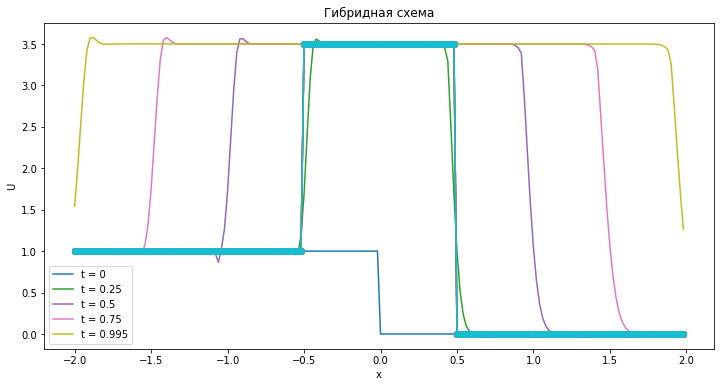

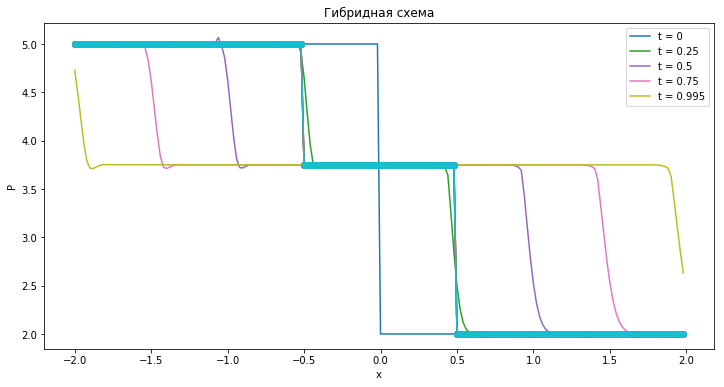

In [7]:
U = np.zeros((gridWidth,gridHeight))
P  = np.zeros((gridWidth,gridHeight))

for j in range(gridHeight):
    for i in range(gridWidth):
        U[i,j] = 0.5*(Y[i,j] + Z[i,j])
        P[i,j] = 0.5*c0*ro0*(Y[i,j] - Z[i,j])

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.plot(x, U_real, marker = "o")
    plt.legend(loc = 'best')
    plt.title(u'Гибридная схема')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (12,6))

for i in (0, 50, 100, 150, 199):
    plt.plot(x, P[:,i], label='t = %s'%t[i])
    plt.plot(x, P_real, marker = "o")
    plt.legend(loc = 'best')
    plt.title(u'Гибридная схема')
    plt.xlabel('x')
    plt.ylabel('P')
plt.show()